#***Problem*** ***Definition***

Estimate the rental cost based on various factors related to the rental such as 'City', 'Weather Condition', 'Rider Age', 'Bike Model',
       'Ride Duration (min)', 'Rider Satisfaction', 'Bike Rental Cost ($)'

# ***Data Collection***

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Read the Excel file into a data frame
df=pd.read_excel('/content/biking_dataset (1).xlsx')
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


#***Data Exploration***

In [ ]:
#first 5 rows of the data frame
df.head()


,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12


In [ ]:
# last 5 rows of the data frame
df.tail()


,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62
899,Dublin,Rainy,37.0,Standard,17.0,9.70,Medium,13.02


In [ ]:
# Determines the total number of elements
df.size

7200

In [ ]:
# Describes number of rows and columns
df.shape

(900, 8)

In [ ]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


In [ ]:
# Describes the dataset
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,890,6,London,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weather Condition,889,4,Rainy,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rider Age,885.0,NaN,NaN,NaN,39.264407,12.373803,18.0,29.0,39.0,50.0,60.0
Bike Model,890,4,Mountain,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ride Duration (min),887.0,NaN,NaN,NaN,62.225479,33.956434,5.0,32.0,62.0,92.0,120.0
Distance Covered (km),887.0,NaN,NaN,NaN,20.13053,11.178777,0.51,10.83,19.99,29.155,39.87
Rider Satisfaction,889,3,High,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike Rental Cost ($),891.0,NaN,NaN,NaN,26.58147,9.438224,7.33,19.21,27.04,33.955,48.38


In [ ]:
# Dimension of the dataset
df.ndim

2

In [ ]:
# Describes the datatype
df.dtypes


,0
City,object
Weather Condition,object
Rider Age,float64
Bike Model,object
Ride Duration (min),float64
Distance Covered (km),float64
Rider Satisfaction,object
Bike Rental Cost ($),float64


#***Data Cleaning and Data Preprocessing***

In [ ]:
# Finding null values
df.isna().sum()

,0
City,10
Weather Condition,11
Rider Age,15
Bike Model,10
Ride Duration (min),13
Distance Covered (km),13
Rider Satisfaction,11
Bike Rental Cost ($),9


In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Filling missing values
# city
df['City'].unique()
df['City'].fillna(df['City'].mode()[0],inplace=True)

In [ ]:
# Weather Condition
df['Weather Condition'].unique()
df['Weather Condition'].fillna(df['Weather Condition'].mode()[0],inplace=True)

In [ ]:
# Rider Age
df['Rider Age'].unique()
df['Rider Age'].fillna(df['Rider Age'].mode()[0],inplace=True)

In [ ]:
# Bike Model
df['Bike Model'].unique()
df['Bike Model'].fillna(df['Bike Model'].mode()[0],inplace=True)

In [ ]:
# Ride Duration (min)
df['Ride Duration (min)'].unique()
df['Ride Duration (min)'].fillna(df['Ride Duration (min)'].median(),inplace=True)



In [ ]:
# Distance Covered (km)
df['Distance Covered (km)'].unique()
df['Distance Covered (km)'].fillna(df['Distance Covered (km)'].mean(),inplace=True)

In [ ]:
#Rider Satisfaction
df['Rider Satisfaction'].unique()
df['Rider Satisfaction'].fillna(df['Rider Satisfaction'].mode()[0],inplace=True)

In [ ]:
# Bike Rental Cost ($)
df['Bike Rental Cost ($)'].unique()
df['Bike Rental Cost ($)'].fillna(df['Bike Rental Cost ($)'].mean(),inplace=True)

In [ ]:
# Check all missing values are filled
df.isna().sum()


,0
City,0
Weather Condition,0
Rider Age,0
Bike Model,0
Ride Duration (min),0
Distance Covered (km),0
Rider Satisfaction,0
Bike Rental Cost ($),0


#***Exploratory Data Analysis***

***Distribution* *Analysis***

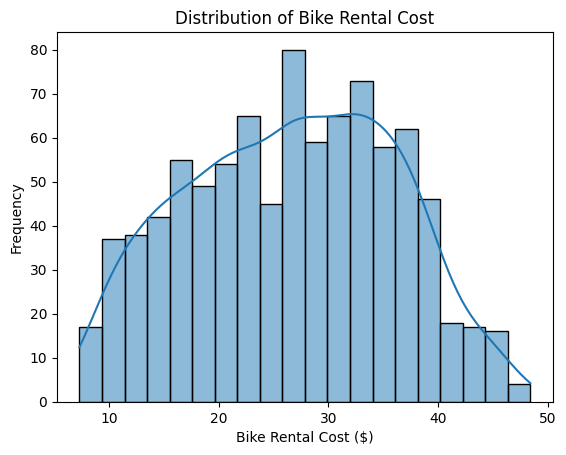

In [ ]:
# Distribution of Bike rental Cost(univariate analysis using Histogram)
sns.histplot(df['Bike Rental Cost ($)'],bins=20,kde=True)
plt.title('Distribution of Bike Rental Cost')
plt.xlabel('Bike Rental Cost ($)')
plt.ylabel('Frequency')
plt.show()
#Data is normally distributed indicates that most bike-rentals fall within a typical price range.
# Distribution signifies that this dataset is balanced.

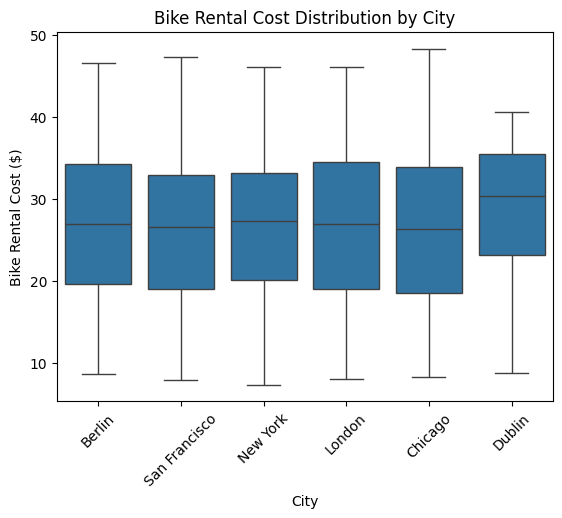

In [ ]:
# Distribution of Bike Rental Cost across different cities
sns.boxplot(x='City', y='Bike Rental Cost ($)', data=df)
plt.title('Bike Rental Cost Distribution by City')
plt.xticks(rotation=45)
plt.show()

***Relationship Analysis***

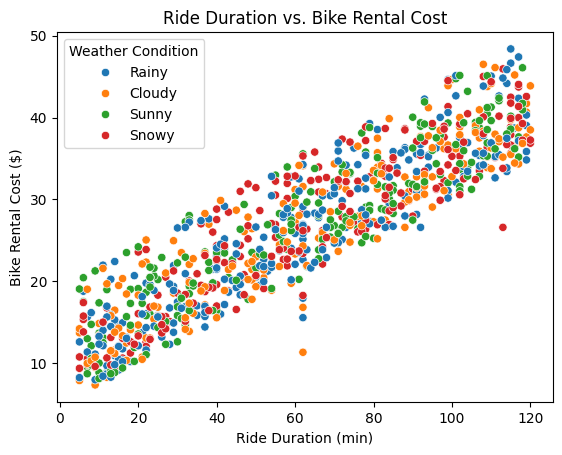

In [ ]:
# Correlation between Ride Duration (min) and Bike Rental Cost in different weather conditions(Bivariant Analysis)
sns.scatterplot(x='Ride Duration (min)', y='Bike Rental Cost ($)', data=df,hue='Weather Condition')
plt.title('Ride Duration vs. Bike Rental Cost')
plt.show()

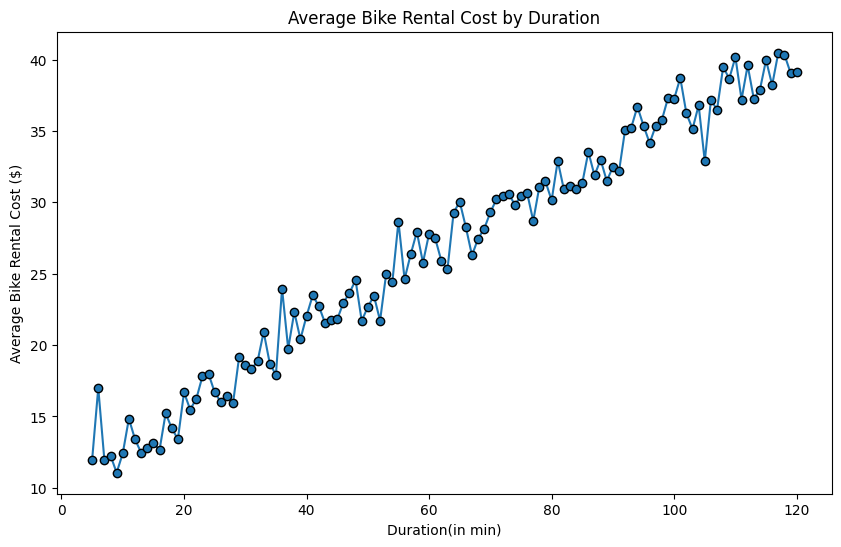

In [ ]:
# Average Bike Rental Cost over Ride Duration using Line Plot(Bivariant Analysis)
plt.figure(figsize=(10, 6))
df.groupby('Ride Duration (min)')['Bike Rental Cost ($)'].mean().plot(marker='o',mec='k')
plt.title('Average Bike Rental Cost by Duration')
plt.xlabel('Duration(in min)')
plt.ylabel('Average Bike Rental Cost ($)')
plt.show()

***Categorical Analysis***

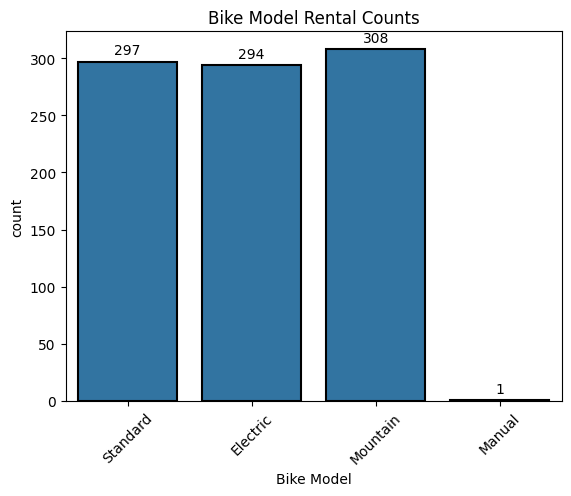

In [ ]:
# Number of rentals for each Bike Model(Univariate analysis)
ax=sns.countplot(x='Bike Model', data=df,edgecolor='black',linewidth=1.5)
ax.bar_label(ax.containers[0],padding=3)
plt.title('Bike Model Rental Counts')
plt.xticks(rotation=45)
plt.show()

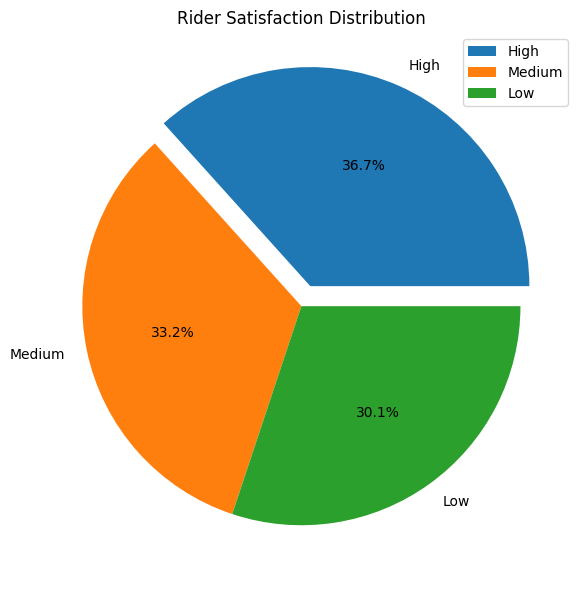

In [ ]:
# Calculate Customer Satisfaction
plt.figure(figsize=(8,6))
df_satisfaction=df['Rider Satisfaction'].value_counts()
plt.pie(x=df_satisfaction,labels=df_satisfaction.index,autopct='%1.1f%%',explode=(0.1,0,0))
plt.title('Rider Satisfaction Distribution')
plt.legend(loc='upper right')
plt.tight_layout()


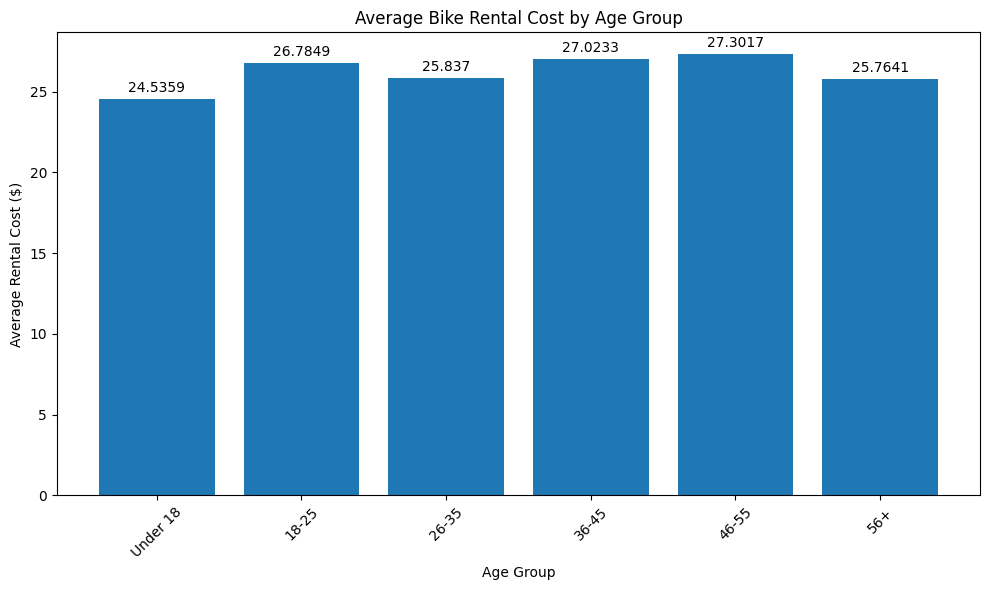

In [ ]:
# Compare the average rental costs for each age-group.

# 1. Create age groups:
age_groups = pd.cut(df['Rider Age'], bins=[0, 18, 25, 35, 45, 55, float('inf')],
                   labels=['Under 18', '18-25', '26-35', '36-45', '46-55', '56+'])

# 2. Group by age groups and calculate average rental cost:
average_cost_by_age = df.groupby(age_groups)['Bike Rental Cost ($)'].mean()

# # 3. Display the results:
# print(average_cost_by_age)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars=plt.bar(average_cost_by_age.index, average_cost_by_age.values)

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Average Rental Cost ($)")
plt.title("Average Bike Rental Cost by Age Group")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45,ha='center')
plt.bar_label(bars, padding=3)
plt.tight_layout()


# Display the chart
plt.show()


# Inference:average costs are relatively consistent across age groups,
# it might indicate that age is not a major factor in bike rental spending

***Advanced Visualization***

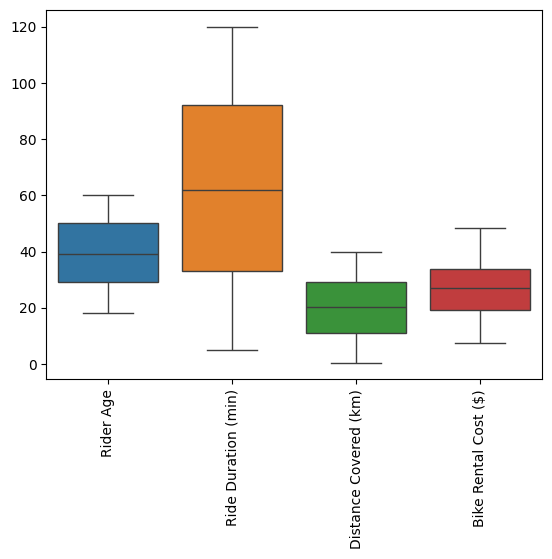

In [ ]:
# Outlier Detection using boxplot(Multivariant Analysis)
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()
# No outliers are present

<Axes: >

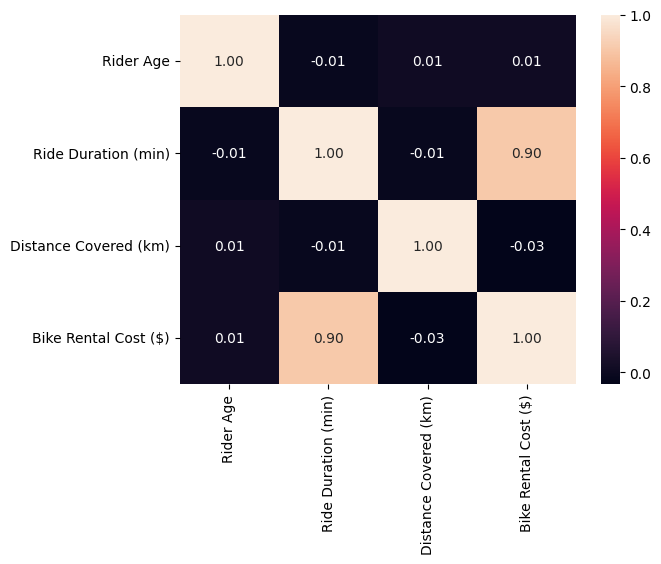

In [ ]:
# Find the correlation between input features and output features using heatmap(Multivariate Analysis)
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='0.2f')

# ***Feature Selection***

In [ ]:
# Since Distance Covered has less correlation with Bike Rental cost,
# drop the column Distance Covered

df.drop('Distance Covered (km)',axis=1,inplace=True)


In [ ]:
# Dataset with significant features
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,Low,13.12
...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,High,39.62


***Encoding***

In [ ]:
# splitting dataframe(df)in to df_num(holds numerical features) and
# df_cat(holds categorical features)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat=df[['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']].apply(le.fit_transform)
df_cat


,City,Weather Condition,Bike Model,Rider Satisfaction
0,0,1,3,0
1,5,0,3,2
2,0,3,0,0
3,5,0,3,1
4,4,3,2,1
...,...,...,...,...
895,4,1,0,2
896,3,0,2,0
897,5,3,2,0
898,1,3,2,0


In [ ]:
# create dataframe df_num(holds numerical features)
df_num=df.drop(['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction'],axis=1)
df_num

,Rider Age,Ride Duration (min),Bike Rental Cost ($)
0,53.0,62.0,22.63
1,39.0,5.0,7.87
2,43.0,106.0,39.40
3,24.0,119.0,37.63
4,24.0,11.0,13.12
...,...,...,...
895,55.0,55.0,26.30
896,47.0,14.0,13.78
897,49.0,23.0,20.47
898,19.0,110.0,39.62


In [ ]:
df_final=pd.concat([df_num,df_cat],axis=1)
df_final

,Rider Age,Ride Duration (min),Bike Rental Cost ($),City,Weather Condition,Bike Model,Rider Satisfaction
0,53.0,62.0,22.63,0,1,3,0
1,39.0,5.0,7.87,5,0,3,2
2,43.0,106.0,39.40,0,3,0,0
3,24.0,119.0,37.63,5,0,3,1
4,24.0,11.0,13.12,4,3,2,1
...,...,...,...,...,...,...,...
895,55.0,55.0,26.30,4,1,0,2
896,47.0,14.0,13.78,3,0,2,0
897,49.0,23.0,20.47,5,3,2,0
898,19.0,110.0,39.62,1,3,2,0


# ***Model Selection,Model Training and Model Evaluation***

In [ ]:
# Splitting the dataset int input features and output features
x=df_final.drop('Bike Rental Cost ($)',axis=1)
y=df_final['Bike Rental Cost ($)']

In [ ]:
# Splitting the dataset in to training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
# Scaling of features using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Model Fitting and Evaluation using different metrics
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error,root_mean_squared_error

# Different Models
Models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),KNeighborsRegressor()]

# collect R2_scores of different modelds
R2_Score=[]

# collect MAPE scores of different models
MAPE=[]

for i in Models:

  print(f'Model is {i}')

  print("************************************")

  i.fit(x_train,y_train)

  y_predict=i.predict(x_test)

  r2=r2_score(y_test,y_predict)

  R2_Score.append(round(r2,2))

  print(f'{i} has R2score {round(r2,2)}')

  print()

  mape=mean_absolute_percentage_error(y_test,y_predict)

  MAPE.append(round(mape,2))

  print(f'{i} has MAPE {round(mape,2)}')

  print()

Model is LinearRegression()
************************************
LinearRegression() has R2score 0.94

LinearRegression() has MAPE 0.09

Model is DecisionTreeRegressor()
************************************
DecisionTreeRegressor() has R2score 0.86

DecisionTreeRegressor() has MAPE 0.12

Model is RandomForestRegressor()
************************************
RandomForestRegressor() has R2score 0.92

RandomForestRegressor() has MAPE 0.1

Model is SVR()
************************************
SVR() has R2score 0.88

SVR() has MAPE 0.13

Model is KNeighborsRegressor()
************************************
KNeighborsRegressor() has R2score 0.83

KNeighborsRegressor() has MAPE 0.15



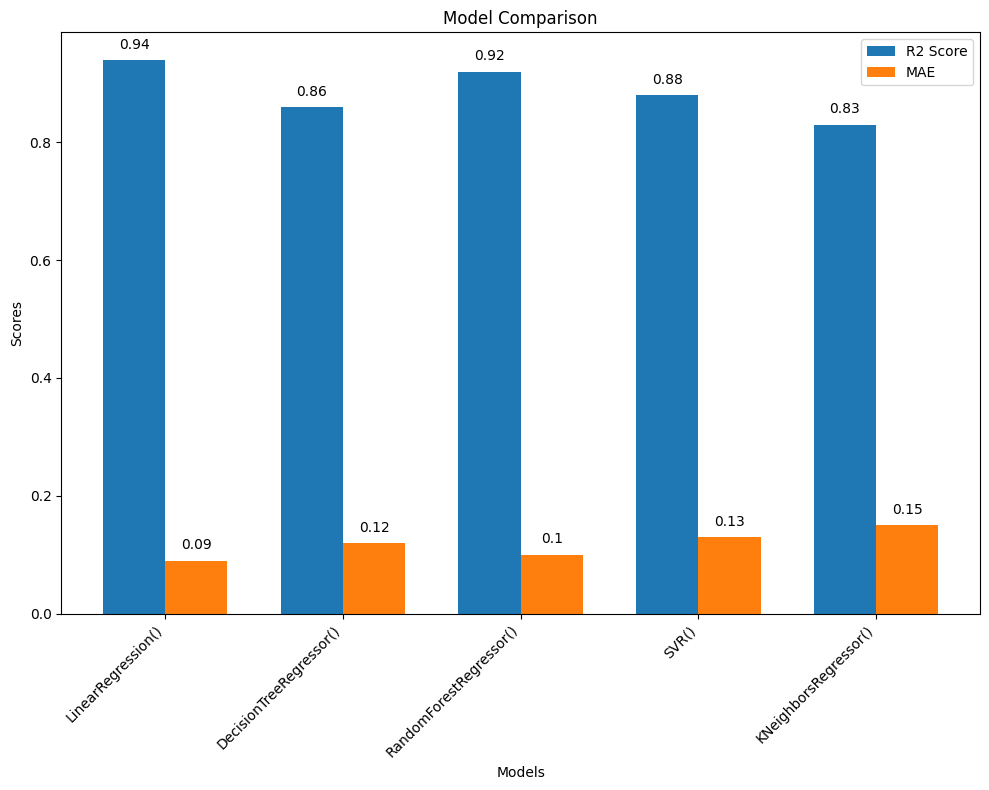

In [ ]:
# Model Comparison


# Create the bar chart
x = np.arange(len(Models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
R2_rect = ax.bar(x - width/2, R2_Score, width, label='R2 Score')
MAPE_rect= ax.bar(x + width/2,MAPE, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(10, 8)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display values above bars
ax.bar_label(R2_rect,padding=6)
ax.bar_label(MAPE_rect,padding=6)

fig.tight_layout()
plt.show()


### ***Conclusion***

Linear Regression is the best performing model compared to other models as it achieves the highest R2_scores and lowest MAPE value across all metrics.